In [167]:
# Pandas & Numpy
import pandas as pd
import numpy as np

# Scikit-learn template
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Choose model
from sklearn.ensemble import RandomForestClassifier

# Choose metric (http://scikit-learn.org/stable/modules/model_evaluation.html)
from sklearn.metrics import f1_score, accuracy_score, auc, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

## 1. Load and Pre-Process data

In [168]:
file1 = 'classification_train.csv'
df1 = pd.read_csv(file1, delimiter=",", index_col=None, header='infer')

In [169]:
file2 = 'regression_train.csv'
df2 = pd.read_csv(file2, delimiter=",", index_col=None, header='infer')

In [170]:
file = 'classification_test.csv'
df1_test = pd.read_csv(file, delimiter=",", index_col=None, header='infer')

In [171]:
file = 'regression_test.csv'
df2_test = pd.read_csv(file, delimiter=",", index_col=None, header='infer')

In [172]:
df1

WifiAccessPoint_0  WifiAccessPoint_1  WifiAccessPoint_2  \
0                  -125              -65.0              -67.0   
1                  -121                NaN              -76.0   
2                  -130                NaN              -98.0   
3                  -125              -49.0              -56.0   
4                  -117                NaN              -75.0   
...                 ...                ...                ...   
3079               -121              -70.0              -51.0   
3080               -119              -70.0              -62.0   
3081               -133              -59.0              -69.0   
3082               -132              -75.0              -70.0   
3083               -135                NaN              -79.0   

      WifiAccessPoint_3  WifiAccessPoint_4  WifiAccessPoint_5  \
0                 -71.0                NaN              -71.0   
1                   NaN              -79.0              -81.0   
2                   NaN                NaN                NaN   
3                 -63.0              -63.0              -47.0   
4                 -82.0                NaN                NaN   
...                 ...                ...                ...   
3079                NaN                NaN                NaN   
3080                NaN              -61.0              -75.0   
3081              -58.0              -72.0              -49.0   
3082              -63.0              -71.0              -78.0   
3083              -85.0                NaN                NaN   

      WifiAccessPoint_6  WifiAccessPoint_7  WifiAccessPoint_8  \
0                 -74.0              -48.0              -91.0   
1                 -72.0              -66.0              -74.0   
2                   NaN              -75.0                NaN   
3                 -69.0              -70.0              -73.0   
4                   NaN                NaN                NaN   
...                 ...                ...                ...   
3079              -79.0              -49.0              -60.0   
3080              -79.0              -57.0              -85.0   
3081              -78.0              -67.0              -69.0   
3082              -74.0              -67.0              -81.0   
3083                NaN              -70.0                NaN   

      WifiAccessPoint_9  WifiAccessPoint_10  WifiAccessPoint_11  \
0                 -39.0               -79.0               -51.0   
1                 -56.0                 NaN               -71.0   
2                 -74.0                 NaN               -79.0   
3                 -68.0               -42.0               -62.0   
4                 -82.0                 NaN               -77.0   
...                 ...                 ...                 ...   
3079              -45.0               -84.0               -69.0   
3080              -57.0                 NaN               -66.0   
3081              -68.0               -55.0               -61.0   
3082              -74.0               -75.0               -71.0   
3083              -74.0                 NaN               -76.0   

      WifiAccessPoint_12  WifiAccessPoint_13  WifiAccessPoint_14  \
0                  -59.0               -55.0               -78.0   
1                  -67.0               -45.0               -58.0   
2                    NaN               -62.0               -51.0   
3                  -50.0                 NaN                 NaN   
4                    NaN               -76.0               -71.0   
...                  ...                 ...                 ...   
3079               -73.0               -54.0               -64.0   
3080               -62.0               -55.0               -53.0   
3081               -65.0                 NaN                 NaN   
3082                 NaN               -58.0               -79.0   
3083                 NaN               -47.0               -60.0   

      WifiAccessPoint_15  WifiAccessPoint

In [173]:
df2

WifiAccessPoint_0  WifiAccessPoint_1  WifiAccessPoint_2  \
0                  -125              -65.0              -67.0   
1                  -121                NaN              -76.0   
2                  -130                NaN              -98.0   
3                  -125              -49.0              -56.0   
4                  -117                NaN              -75.0   
...                 ...                ...                ...   
3079               -121              -70.0              -51.0   
3080               -119              -70.0              -62.0   
3081               -133              -59.0              -69.0   
3082               -132              -75.0              -70.0   
3083               -135                NaN              -79.0   

      WifiAccessPoint_3  WifiAccessPoint_4  WifiAccessPoint_5  \
0                 -71.0                NaN              -71.0   
1                   NaN              -79.0              -81.0   
2                   NaN                NaN                NaN   
3                 -63.0              -63.0              -47.0   
4                 -82.0                NaN                NaN   
...                 ...                ...                ...   
3079                NaN                NaN                NaN   
3080                NaN              -61.0              -75.0   
3081              -58.0              -72.0              -49.0   
3082              -63.0              -71.0              -78.0   
3083              -85.0                NaN                NaN   

      WifiAccessPoint_6  WifiAccessPoint_7  WifiAccessPoint_8  \
0                 -74.0              -48.0              -91.0   
1                 -72.0              -66.0              -74.0   
2                   NaN              -75.0                NaN   
3                 -69.0              -70.0              -73.0   
4                   NaN                NaN                NaN   
...                 ...                ...                ...   
3079              -79.0              -49.0              -60.0   
3080              -79.0              -57.0              -85.0   
3081              -78.0              -67.0              -69.0   
3082              -74.0              -67.0              -81.0   
3083                NaN              -70.0                NaN   

      WifiAccessPoint_9  WifiAccessPoint_10  WifiAccessPoint_11  \
0                 -39.0               -79.0               -51.0   
1                 -56.0                 NaN               -71.0   
2                 -74.0                 NaN               -79.0   
3                 -68.0               -42.0               -62.0   
4                 -82.0                 NaN               -77.0   
...                 ...                 ...                 ...   
3079              -45.0               -84.0               -69.0   
3080              -57.0                 NaN               -66.0   
3081              -68.0               -55.0               -61.0   
3082              -74.0               -75.0               -71.0   
3083              -74.0                 NaN               -76.0   

      WifiAccessPoint_12  WifiAccessPoint_13  WifiAccessPoint_14  \
0                  -59.0               -55.0               -78.0   
1                  -67.0               -45.0               -58.0   
2                    NaN               -62.0               -51.0   
3                  -50.0                 NaN                 NaN   
4                    NaN               -76.0               -71.0   
...                  ...                 ...                 ...   
3079               -73.0               -54.0               -64.0   
3080               -62.0               -55.0               -53.0   
3081               -65.0                 NaN                 NaN   
3082                 NaN               -58.0               -79.0   
3083                 NaN               -47.0               -60.0   

      WifiAccessPoint_15  WifiAccessPoint

In [174]:
df1_test

WifiAccessPoint_0  WifiAccessPoint_1  WifiAccessPoint_2  \
0                 -123                NaN              -75.0   
1                 -127                NaN                NaN   
2                 -133              -78.0              -68.0   
3                 -124                NaN                NaN   
4                 -127              -68.0              -57.0   
..                 ...                ...                ...   
764               -133              -69.0              -64.0   
765               -119              -67.0              -67.0   
766               -129              -79.0              -71.0   
767               -123              -81.0              -92.0   
768               -122              -72.0              -58.0   

     WifiAccessPoint_3  WifiAccessPoint_4  WifiAccessPoint_5  \
0                -73.0                NaN                NaN   
1                  NaN                NaN                NaN   
2                  NaN              -72.0                NaN   
3                  NaN                NaN                NaN   
4                -56.0              -62.0              -65.0   
..                 ...                ...                ...   
764              -71.0                NaN              -85.0   
765              -64.0              -66.0              -55.0   
766              -76.0              -79.0              -80.0   
767                NaN                NaN              -89.0   
768              -66.0              -66.0                NaN   

     WifiAccessPoint_6  WifiAccessPoint_7  WifiAccessPoint_8  \
0                  NaN              -83.0                NaN   
1                  NaN              -60.0                NaN   
2                -64.0              -55.0              -71.0   
3                  NaN                NaN                NaN   
4                -67.0              -78.0              -74.0   
..                 ...                ...                ...   
764              -79.0                NaN              -84.0   
765              -74.0              -65.0              -69.0   
766                NaN              -66.0              -85.0   
767              -86.0              -60.0              -78.0   
768              -81.0              -60.0              -72.0   

     WifiAccessPoint_9  WifiAccessPoint_10  WifiAccessPoint_11  \
0                -71.0                 NaN                 NaN   
1                -62.0                 NaN               -86.0   
2                -51.0                 NaN               -61.0   
3                  NaN                 NaN                 NaN   
4                -74.0               -75.0               -74.0   
..                 ...                 ...                 ...   
764              -71.0                 NaN                 NaN   
765              -75.0               -55.0               -53.0   
766              -64.0                 NaN               -87.0   
767              -61.0                 NaN               -78.0   
768              -56.0               -79.0               -76.0   

     WifiAccessPoint_12  WifiAccessPoint_13  WifiAccessPoint_14  \
0                   NaN                 NaN               -71.0   
1                   NaN               -59.0               -58.0   
2                 -67.0               -48.0               -54.0   
3                   NaN               -83.0               -71.0   
4                   NaN               -73.0               -88.0   
..                  ...                 ...                 ...   
764                 NaN               -84.0               -67.0   
765               -65.0                 NaN                 NaN   
766                 NaN               -64.0               -59.0   
767               -81.0               -65.0               -84.0   
768               -79.0               -34.0               -66.0   

     WifiAccessPoint_15  WifiAccessPoint_16  WifiAccessPoint_17  \
0                   NaN          

In [175]:
df2_test

WifiAccessPoint_0  WifiAccessPoint_1  WifiAccessPoint_2  \
0                 -123                NaN              -75.0   
1                 -127                NaN                NaN   
2                 -133              -78.0              -68.0   
3                 -124                NaN                NaN   
4                 -127              -68.0              -57.0   
..                 ...                ...                ...   
764               -133              -69.0              -64.0   
765               -119              -67.0              -67.0   
766               -129              -79.0              -71.0   
767               -123              -81.0              -92.0   
768               -122              -72.0              -58.0   

     WifiAccessPoint_3  WifiAccessPoint_4  WifiAccessPoint_5  \
0                -73.0                NaN                NaN   
1                  NaN                NaN                NaN   
2                  NaN              -72.0                NaN   
3                  NaN                NaN                NaN   
4                -56.0              -62.0              -65.0   
..                 ...                ...                ...   
764              -71.0                NaN              -85.0   
765              -64.0              -66.0              -55.0   
766              -76.0              -79.0              -80.0   
767                NaN                NaN              -89.0   
768              -66.0              -66.0                NaN   

     WifiAccessPoint_6  WifiAccessPoint_7  WifiAccessPoint_8  \
0                  NaN              -83.0                NaN   
1                  NaN              -60.0                NaN   
2                -64.0              -55.0              -71.0   
3                  NaN                NaN                NaN   
4                -67.0              -78.0              -74.0   
..                 ...                ...                ...   
764              -79.0                NaN              -84.0   
765              -74.0              -65.0              -69.0   
766                NaN              -66.0              -85.0   
767              -86.0              -60.0              -78.0   
768              -81.0              -60.0              -72.0   

     WifiAccessPoint_9  WifiAccessPoint_10  WifiAccessPoint_11  \
0                -71.0                 NaN                 NaN   
1                -62.0                 NaN               -86.0   
2                -51.0                 NaN               -61.0   
3                  NaN                 NaN                 NaN   
4                -74.0               -75.0               -74.0   
..                 ...                 ...                 ...   
764              -71.0                 NaN                 NaN   
765              -75.0               -55.0               -53.0   
766              -64.0                 NaN               -87.0   
767              -61.0                 NaN               -78.0   
768              -56.0               -79.0               -76.0   

     WifiAccessPoint_12  WifiAccessPoint_13  WifiAccessPoint_14  \
0                   NaN                 NaN               -71.0   
1                   NaN               -59.0               -58.0   
2                 -67.0               -48.0               -54.0   
3                   NaN               -83.0               -71.0   
4                   NaN               -73.0               -88.0   
..                  ...                 ...                 ...   
764                 NaN               -84.0               -67.0   
765               -65.0                 NaN                 NaN   
766                 NaN               -64.0               -59.0   
767               -81.0               -65.0               -84.0   
768               -79.0               -34.0               -66.0   

     WifiAccessPoint_15  WifiAccessPoint_16  WifiAccessPoint_17  \
0                   NaN          

#### Make sure classification_train.csv and regression_train.csv have the same data value

#### Combine x,y value with location coded

In [176]:
df2['location_coded']=np.nan
df2['location_coded']=df1['location_coded']

In [177]:
#train data
df = df2

In [178]:
df2_test['location_coded']=np.nan
df2_test['location_coded']=df1_test['location_coded']

In [179]:
#test data
df_test = df2_test

## 2. Exploratory Data Analysis (EDA)

In [180]:
df

WifiAccessPoint_0  WifiAccessPoint_1  WifiAccessPoint_2  \
0                  -125              -65.0              -67.0   
1                  -121                NaN              -76.0   
2                  -130                NaN              -98.0   
3                  -125              -49.0              -56.0   
4                  -117                NaN              -75.0   
...                 ...                ...                ...   
3079               -121              -70.0              -51.0   
3080               -119              -70.0              -62.0   
3081               -133              -59.0              -69.0   
3082               -132              -75.0              -70.0   
3083               -135                NaN              -79.0   

      WifiAccessPoint_3  WifiAccessPoint_4  WifiAccessPoint_5  \
0                 -71.0                NaN              -71.0   
1                   NaN              -79.0              -81.0   
2                   NaN                NaN                NaN   
3                 -63.0              -63.0              -47.0   
4                 -82.0                NaN                NaN   
...                 ...                ...                ...   
3079                NaN                NaN                NaN   
3080                NaN              -61.0              -75.0   
3081              -58.0              -72.0              -49.0   
3082              -63.0              -71.0              -78.0   
3083              -85.0                NaN                NaN   

      WifiAccessPoint_6  WifiAccessPoint_7  WifiAccessPoint_8  \
0                 -74.0              -48.0              -91.0   
1                 -72.0              -66.0              -74.0   
2                   NaN              -75.0                NaN   
3                 -69.0              -70.0              -73.0   
4                   NaN                NaN                NaN   
...                 ...                ...                ...   
3079              -79.0              -49.0              -60.0   
3080              -79.0              -57.0              -85.0   
3081              -78.0              -67.0              -69.0   
3082              -74.0              -67.0              -81.0   
3083                NaN              -70.0                NaN   

      WifiAccessPoint_9  WifiAccessPoint_10  WifiAccessPoint_11  \
0                 -39.0               -79.0               -51.0   
1                 -56.0                 NaN               -71.0   
2                 -74.0                 NaN               -79.0   
3                 -68.0               -42.0               -62.0   
4                 -82.0                 NaN               -77.0   
...                 ...                 ...                 ...   
3079              -45.0               -84.0               -69.0   
3080              -57.0                 NaN               -66.0   
3081              -68.0               -55.0               -61.0   
3082              -74.0               -75.0               -71.0   
3083              -74.0                 NaN               -76.0   

      WifiAccessPoint_12  WifiAccessPoint_13  WifiAccessPoint_14  \
0                  -59.0               -55.0               -78.0   
1                  -67.0               -45.0               -58.0   
2                    NaN               -62.0               -51.0   
3                  -50.0                 NaN                 NaN   
4                    NaN               -76.0               -71.0   
...                  ...                 ...                 ...   
3079               -73.0               -54.0               -64.0   
3080               -62.0               -55.0               -53.0   
3081               -65.0                 NaN                 NaN   
3082                 NaN               -58.0               -79.0   
3083                 NaN               -47.0               -60.0   

      WifiAccessPoint_15  WifiAccessPoint

#### Location coded mapping

In [181]:
len(df['location_coded'].unique())

93

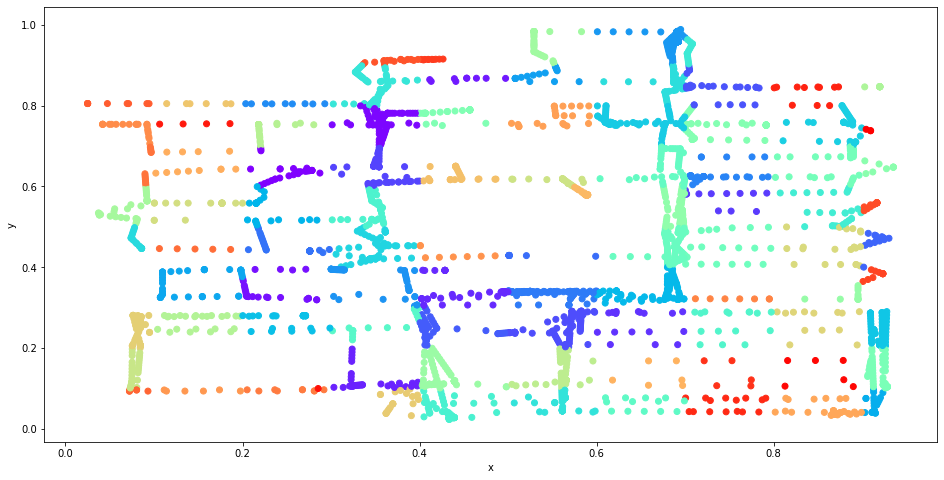

In [182]:
#Location coded mapping based on x y
colormap = plt.cm.rainbow
list_coded = df['location_coded'].unique()
dict_color = {k: v for v, k in enumerate(list_coded)}
colors = [colormap(i) for i in np.linspace(0, 1, len(list_coded))]
dict_color_rgb = {v: k for v, k in enumerate(colors)}
df['color'] = df['location_coded'].map(dict_color)
df['color'] = df['color'].map(dict_color_rgb)

fig, ax = plt.subplots(figsize=(16,8))
plt.scatter(df['x'],df['y'], c=df['color'])
plt.xlabel('x')
plt.ylabel('y')
#plt.legend(loc="upper left")
plt.show()

#### Wifi plot for each WifiAccessPoint

In [183]:
def plot_wifi(column):
    df['color'] = 'white'
    df.loc[df[column]>=-60, 'color'] = 'maroon'
    df.loc[(df[column]>=-70) & (df[column]<-60), 'color'] = 'red'
    df.loc[(df[column]>=-80) & (df[column]<-70), 'color'] = 'tomato'
    df.loc[(df[column]>=-90) & (df[column]<-80), 'color'] = 'orange'
    df.loc[(df[column]>=-100) & (df[column]<-90), 'color'] = 'goldenrod'
    df.loc[(df[column]>=-110) & (df[column]<-100), 'color'] = 'yellow'
    df.loc[(df[column]>=-120) & (df[column]<-110), 'color'] = 'grey'
    df.loc[(df[column]>=-130) & (df[column]<-120), 'color'] = 'silver'
    df.loc[(df[column]<=-130), 'color'] = 'ivory'

    fig, ax = plt.subplots(figsize=(16,8))
    plt.scatter(df['x'],df['y'], c=df['color'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

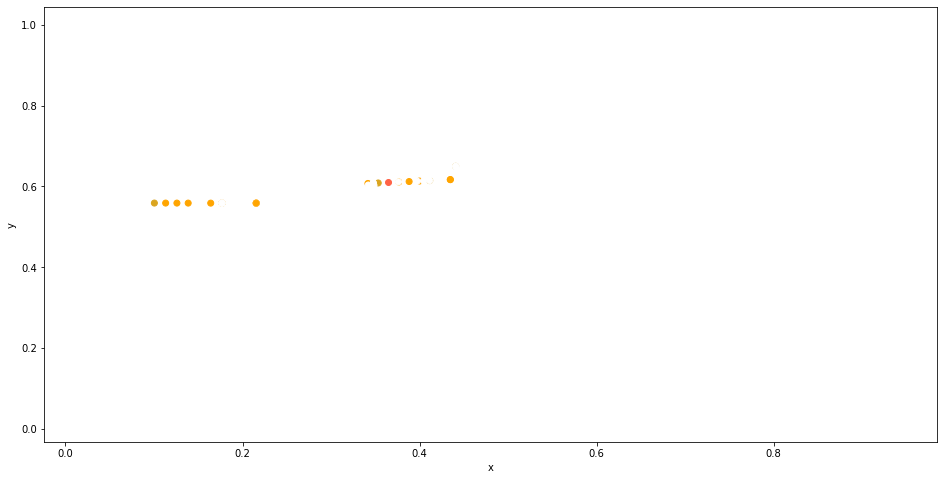

In [186]:
plot_wifi('WifiAccessPoint_75')

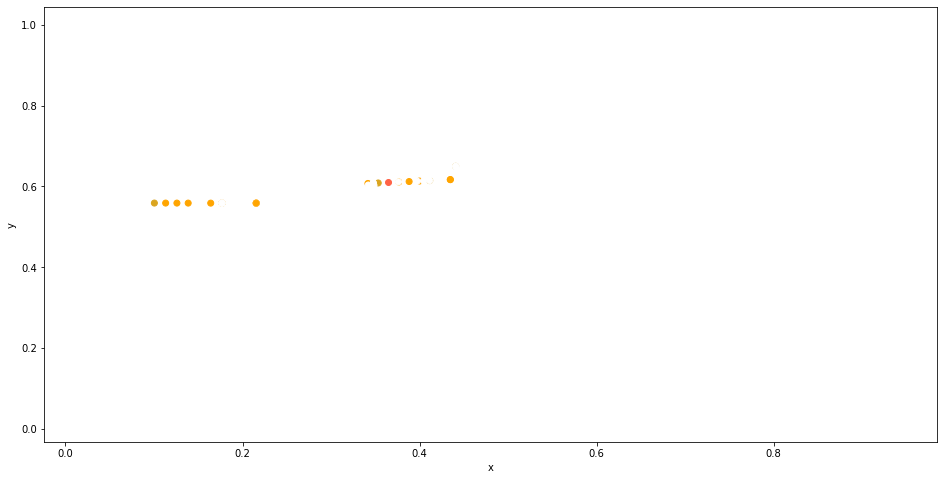

In [139]:
plot_wifi('WifiAccessPoint_75')

## 3. Correlation

#### Change location_coded into integer format

In [145]:
df

WifiAccessPoint_0  WifiAccessPoint_1  WifiAccessPoint_2  \
0                  -125              -65.0              -67.0   
1                  -121                NaN              -76.0   
2                  -130                NaN              -98.0   
3                  -125              -49.0              -56.0   
4                  -117                NaN              -75.0   
...                 ...                ...                ...   
3079               -121              -70.0              -51.0   
3080               -119              -70.0              -62.0   
3081               -133              -59.0              -69.0   
3082               -132              -75.0              -70.0   
3083               -135                NaN              -79.0   

      WifiAccessPoint_3  WifiAccessPoint_4  WifiAccessPoint_5  \
0                 -71.0                NaN              -71.0   
1                   NaN              -79.0              -81.0   
2                   NaN                NaN                NaN   
3                 -63.0              -63.0              -47.0   
4                 -82.0                NaN                NaN   
...                 ...                ...                ...   
3079                NaN                NaN                NaN   
3080                NaN              -61.0              -75.0   
3081              -58.0              -72.0              -49.0   
3082              -63.0              -71.0              -78.0   
3083              -85.0                NaN                NaN   

      WifiAccessPoint_6  WifiAccessPoint_7  WifiAccessPoint_8  \
0                 -74.0              -48.0              -91.0   
1                 -72.0              -66.0              -74.0   
2                   NaN              -75.0                NaN   
3                 -69.0              -70.0              -73.0   
4                   NaN                NaN                NaN   
...                 ...                ...                ...   
3079              -79.0              -49.0              -60.0   
3080              -79.0              -57.0              -85.0   
3081              -78.0              -67.0              -69.0   
3082              -74.0              -67.0              -81.0   
3083                NaN              -70.0                NaN   

      WifiAccessPoint_9  WifiAccessPoint_10  WifiAccessPoint_11  \
0                 -39.0               -79.0               -51.0   
1                 -56.0                 NaN               -71.0   
2                 -74.0                 NaN               -79.0   
3                 -68.0               -42.0               -62.0   
4                 -82.0                 NaN               -77.0   
...                 ...                 ...                 ...   
3079              -45.0               -84.0               -69.0   
3080              -57.0                 NaN               -66.0   
3081              -68.0               -55.0               -61.0   
3082              -74.0               -75.0               -71.0   
3083              -74.0                 NaN               -76.0   

      WifiAccessPoint_12  WifiAccessPoint_13  WifiAccessPoint_14  \
0                  -59.0               -55.0               -78.0   
1                  -67.0               -45.0               -58.0   
2                    NaN               -62.0               -51.0   
3                  -50.0                 NaN                 NaN   
4                    NaN               -76.0               -71.0   
...                  ...                 ...                 ...   
3079               -73.0               -54.0               -64.0   
3080               -62.0               -55.0               -53.0   
3081               -65.0                 NaN                 NaN   
3082                 NaN               -58.0               -79.0   
3083                 NaN               -47.0               -60.0   

      WifiAccessPoint_15  WifiAccessPoint

#### x,y value and location_coded relation

In [146]:
df['loc'] = 3624847 + 961*((df['x']/0.1).apply(np.floor))+ ((df['y']/0.1).apply(np.floor))

In [147]:
df

WifiAccessPoint_0  WifiAccessPoint_1  WifiAccessPoint_2  \
0                  -125              -65.0              -67.0   
1                  -121                NaN              -76.0   
2                  -130                NaN              -98.0   
3                  -125              -49.0              -56.0   
4                  -117                NaN              -75.0   
...                 ...                ...                ...   
3079               -121              -70.0              -51.0   
3080               -119              -70.0              -62.0   
3081               -133              -59.0              -69.0   
3082               -132              -75.0              -70.0   
3083               -135                NaN              -79.0   

      WifiAccessPoint_3  WifiAccessPoint_4  WifiAccessPoint_5  \
0                 -71.0                NaN              -71.0   
1                   NaN              -79.0              -81.0   
2                   NaN                NaN                NaN   
3                 -63.0              -63.0              -47.0   
4                 -82.0                NaN                NaN   
...                 ...                ...                ...   
3079                NaN                NaN                NaN   
3080                NaN              -61.0              -75.0   
3081              -58.0              -72.0              -49.0   
3082              -63.0              -71.0              -78.0   
3083              -85.0                NaN                NaN   

      WifiAccessPoint_6  WifiAccessPoint_7  WifiAccessPoint_8  \
0                 -74.0              -48.0              -91.0   
1                 -72.0              -66.0              -74.0   
2                   NaN              -75.0                NaN   
3                 -69.0              -70.0              -73.0   
4                   NaN                NaN                NaN   
...                 ...                ...                ...   
3079              -79.0              -49.0              -60.0   
3080              -79.0              -57.0              -85.0   
3081              -78.0              -67.0              -69.0   
3082              -74.0              -67.0              -81.0   
3083                NaN              -70.0                NaN   

      WifiAccessPoint_9  WifiAccessPoint_10  WifiAccessPoint_11  \
0                 -39.0               -79.0               -51.0   
1                 -56.0                 NaN               -71.0   
2                 -74.0                 NaN               -79.0   
3                 -68.0               -42.0               -62.0   
4                 -82.0                 NaN               -77.0   
...                 ...                 ...                 ...   
3079              -45.0               -84.0               -69.0   
3080              -57.0                 NaN               -66.0   
3081              -68.0               -55.0               -61.0   
3082              -74.0               -75.0               -71.0   
3083              -74.0                 NaN               -76.0   

      WifiAccessPoint_12  WifiAccessPoint_13  WifiAccessPoint_14  \
0                  -59.0               -55.0               -78.0   
1                  -67.0               -45.0               -58.0   
2                    NaN               -62.0               -51.0   
3                  -50.0                 NaN                 NaN   
4                    NaN               -76.0               -71.0   
...                  ...                 ...                 ...   
3079               -73.0               -54.0               -64.0   
3080               -62.0               -55.0               -53.0   
3081               -65.0                 NaN                 NaN   
3082                 NaN               -58.0               -79.0   
3083                 NaN               -47.0               -60.0   

      WifiAccessPoint_15  WifiAccessPoint

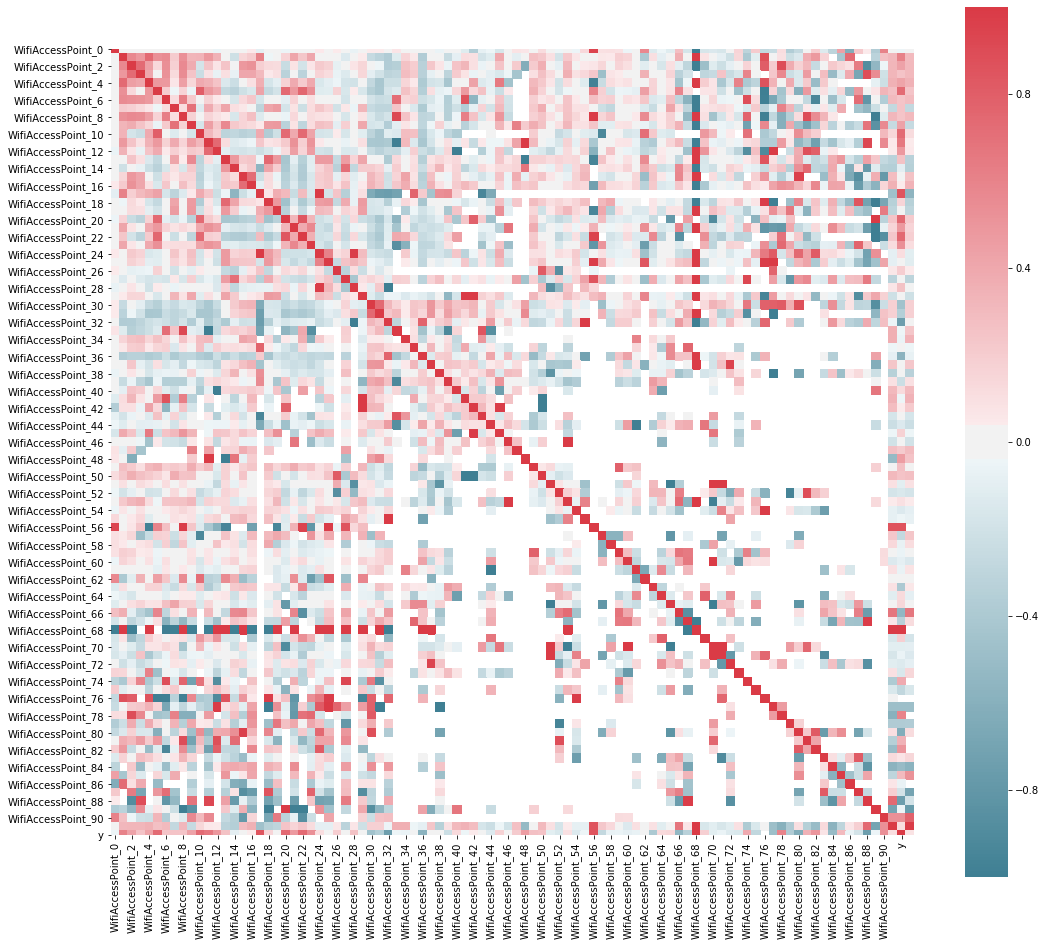

In [148]:
f, ax = plt.subplots(figsize=(18, 16))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## 4. Data preparation to ML

#### Remove unknown location

In [149]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
df.describe().T

count          mean          std           min  \
WifiAccessPoint_0   3084.0 -1.265901e+02     5.056859 -1.450000e+02   
WifiAccessPoint_1   2298.0 -6.988555e+01    11.988474 -1.020000e+02   
WifiAccessPoint_2   2747.0 -6.992501e+01    11.946051 -1.040000e+02   
WifiAccessPoint_3   1837.0 -6.772074e+01    10.274228 -9.600000e+01   
WifiAccessPoint_4   1548.0 -6.689664e+01    10.347594 -9.100000e+01   
WifiAccessPoint_5   1784.0 -7.161883e+01    13.882424 -1.030000e+02   
WifiAccessPoint_6   1749.0 -7.536192e+01     9.215011 -1.060000e+02   
WifiAccessPoint_7   2091.0 -6.800000e+01     9.883484 -9.700000e+01   
WifiAccessPoint_8   1787.0 -7.549804e+01     9.156067 -9.900000e+01   
WifiAccessPoint_9   2717.0 -7.016378e+01    11.682441 -1.050000e+02   
WifiAccessPoint_10  1266.0 -6.766509e+01    11.980287 -9.800000e+01   
WifiAccessPoint_11  1952.0 -6.997592e+01    12.572208 -1.000000e+02   
WifiAccessPoint_12  1315.0 -6.787148e+01    10.722005 -9.500000e+01   
WifiAccessPoint_13  2651.0 -6.859751e+01    11.548316 -1.040000e+02   
WifiAccessPoint_14  2665.0 -6.785929e+01    11.179941 -9.900000e+01   
WifiAccessPoint_15  2063.0 -6.841978e+01    10.395582 -9.600000e+01   
WifiAccessPoint_16  2815.0 -6.868242e+01    11.016497 -9.800000e+01   
WifiAccessPoint_17   185.0 -6.106486e+01    12.213059 -9.600000e+01   
WifiAccessPoint_18  2106.0 -6.811728e+01    10.666573 -9.500000e+01   
WifiAccessPoint_19  1280.0 -7.691250e+01     8.478838 -1.000000e+02   
WifiAccessPoint_20  1030.0 -7.121262e+01    13.616304 -1.000000e+02   
WifiAccessPoint_21  1389.0 -7.807055e+01     8.797559 -1.010000e+02   
WifiAccessPoint_22  1130.0 -7.273274e+01    14.123123 -1.030000e+02   
WifiAccessPoint_23  1284.0 -7.688474e+01     8.446842 -1.010000e+02   
WifiAccessPoint_24  1319.0 -7.784913e+01     8.836870 -9.900000e+01   
WifiAccessPoint_25  1329.0 -7.802483e+01     8.837309 -1.050000e+02   
WifiAccessPoint_26   279.0 -8.329032e+01     6.327820 -1.050000e+02   
WifiAccessPoint_27  1911.0 -6.756044e+01    10.436865 -1.020000e+02   
WifiAccessPoint_28   280.0 -7.535714e+01     5.772350 -9.400000e+01   
WifiAccessPoint_29  1301.0 -7.661799e+01    10.124196 -1.010000e+02   
WifiAccessPoint_30  2385.0 -6.891488e+01    11.815197 -1.010000e+02   
WifiAccessPoint_31  1938.0 -6.827141e+01    10.825867 -9.800000e+01   
WifiAccessPoint_32  2007.0 -6.825909e+01    13.747242 -9.900000e+01   
WifiAccessPoint_33    35.0 -8.174286e+01     5.751434 -9.400000e+01   
WifiAccessPoint_34    85.0 -8.547059e+01     5.983287 -9.900000e+01   
WifiAccessPoint_35   321.0 -7.702181e+01     6.256209 -9.300000e+01   
WifiAccessPoint_36  1338.0 -6.345441e+01    11.713410 -9.600000e+01   
WifiAccessPoint_37   853.0 -8.099648e+01     7.926673 -1.030000e+02   
WifiAccessPoint_38  1025.0 -8.165171e+01     7.261350 -1.040000e+02   
WifiAccessPoint_39   764.0 -8.186518e+01     6.841121 -1.050000e+02   
WifiAccessPoint_40   262.0 -7.838931e+01     6.187458 -9.700000e+01   
WifiAccessPoint_41    42.0 -8.488095e+01     4.854982 -9.600000e+01   
WifiAccessPoint_42    40.0 -8.650000e+01     4.888500 -9.400000e+01   
WifiAccessPoint_43   242.0 -7.828926e+01     6.372188 -1.040000e+02   
WifiAccessPoint_44  1037.0 -8.088332e+01     7.634437 -1.070000e+02   
WifiAccessPoint_45    71.0 -8.461972e+01     6.027002 -1.000000e+02   
WifiAccessPoint_46   343.0 -7.829446e+01     6.270990 -9.700000e+01   
WifiAccessPoint_47    42.0 -8.607143e+01     5.148492 -9.500000e+01   
WifiAccessPoint_48    10.0 -8.880000e+01     4.779586 -9.600000e+01   
WifiAccessPoint_49   134.0 -8.632090e+01     5.717143 -9.900000e+01   
WifiAccessPoint_50    85.0 -8.382353e+01     5.786224 -1.000000e+02   
WifiAccessPoint_51   257.0 -8.528016e+01     5.909417 -1.020000e+02   
WifiAccessPoint_52   294.0 -8.645238e+01     5.765862 -1.040000e+02   
WifiAccessPoint_53   388.0 -8.392784e+01     7.000550 -1.010000e+02   
WifiAccessPoint_54   280.0 -8.519643e+01     5.532633 -1.030000e+02   
WifiAccessPoint_55    29.0 -8.648276e+01     

In [150]:
df = df.loc[pd.notnull(df['x'])]
df = df.loc[pd.notnull(df['y'])]

In [151]:
df.describe().T

count          mean          std           min  \
WifiAccessPoint_0   3063.0 -1.265939e+02     5.055691 -1.450000e+02   
WifiAccessPoint_1   2279.0 -6.988328e+01    11.985486 -1.020000e+02   
WifiAccessPoint_2   2726.0 -6.994828e+01    11.954312 -1.040000e+02   
WifiAccessPoint_3   1822.0 -6.774533e+01    10.264911 -9.600000e+01   
WifiAccessPoint_4   1534.0 -6.691330e+01    10.366395 -9.100000e+01   
WifiAccessPoint_5   1768.0 -7.155656e+01    13.894508 -1.030000e+02   
WifiAccessPoint_6   1730.0 -7.534162e+01     9.227762 -1.060000e+02   
WifiAccessPoint_7   2071.0 -6.803139e+01     9.870880 -9.700000e+01   
WifiAccessPoint_8   1768.0 -7.547568e+01     9.145091 -9.900000e+01   
WifiAccessPoint_9   2697.0 -7.022136e+01    11.689968 -1.050000e+02   
WifiAccessPoint_10  1256.0 -6.760032e+01    11.976117 -9.800000e+01   
WifiAccessPoint_11  1932.0 -6.999534e+01    12.580985 -1.000000e+02   
WifiAccessPoint_12  1301.0 -6.787548e+01    10.732188 -9.500000e+01   
WifiAccessPoint_13  2630.0 -6.866312e+01    11.538276 -1.040000e+02   
WifiAccessPoint_14  2644.0 -6.790091e+01    11.162543 -9.900000e+01   
WifiAccessPoint_15  2049.0 -6.840020e+01    10.401788 -9.600000e+01   
WifiAccessPoint_16  2794.0 -6.869363e+01    11.021993 -9.800000e+01   
WifiAccessPoint_17   185.0 -6.106486e+01    12.213059 -9.600000e+01   
WifiAccessPoint_18  2088.0 -6.816379e+01    10.664730 -9.500000e+01   
WifiAccessPoint_19  1262.0 -7.694453e+01     8.452419 -1.000000e+02   
WifiAccessPoint_20  1021.0 -7.110970e+01    13.599081 -1.000000e+02   
WifiAccessPoint_21  1375.0 -7.807200e+01     8.785900 -1.010000e+02   
WifiAccessPoint_22  1122.0 -7.268093e+01    14.154486 -1.030000e+02   
WifiAccessPoint_23  1272.0 -7.685849e+01     8.432102 -1.010000e+02   
WifiAccessPoint_24  1303.0 -7.791021e+01     8.838737 -9.900000e+01   
WifiAccessPoint_25  1313.0 -7.810434e+01     8.796250 -1.050000e+02   
WifiAccessPoint_26   278.0 -8.326259e+01     6.322223 -1.050000e+02   
WifiAccessPoint_27  1894.0 -6.759345e+01    10.439749 -1.020000e+02   
WifiAccessPoint_28   279.0 -7.532258e+01     5.753625 -9.400000e+01   
WifiAccessPoint_29  1282.0 -7.665289e+01    10.118522 -1.010000e+02   
WifiAccessPoint_30  2370.0 -6.888186e+01    11.825717 -1.010000e+02   
WifiAccessPoint_31  1932.0 -6.825000e+01    10.829842 -9.800000e+01   
WifiAccessPoint_32  1993.0 -6.818966e+01    13.748974 -9.900000e+01   
WifiAccessPoint_33    35.0 -8.174286e+01     5.751434 -9.400000e+01   
WifiAccessPoint_34    85.0 -8.547059e+01     5.983287 -9.900000e+01   
WifiAccessPoint_35   321.0 -7.702181e+01     6.256209 -9.300000e+01   
WifiAccessPoint_36  1334.0 -6.341754e+01    11.695192 -9.600000e+01   
WifiAccessPoint_37   849.0 -8.100000e+01     7.926252 -1.030000e+02   
WifiAccessPoint_38  1019.0 -8.165064e+01     7.261711 -1.040000e+02   
WifiAccessPoint_39   762.0 -8.187270e+01     6.825269 -1.050000e+02   
WifiAccessPoint_40   262.0 -7.838931e+01     6.187458 -9.700000e+01   
WifiAccessPoint_41    42.0 -8.488095e+01     4.854982 -9.600000e+01   
WifiAccessPoint_42    40.0 -8.650000e+01     4.888500 -9.400000e+01   
WifiAccessPoint_43   240.0 -7.830000e+01     6.381327 -1.040000e+02   
WifiAccessPoint_44  1032.0 -8.087791e+01     7.647332 -1.070000e+02   
WifiAccessPoint_45    69.0 -8.457971e+01     6.088576 -1.000000e+02   
WifiAccessPoint_46   342.0 -7.826316e+01     6.253284 -9.700000e+01   
WifiAccessPoint_47    42.0 -8.607143e+01     5.148492 -9.500000e+01   
WifiAccessPoint_48    10.0 -8.880000e+01     4.779586 -9.600000e+01   
WifiAccessPoint_49   134.0 -8.632090e+01     5.717143 -9.900000e+01   
WifiAccessPoint_50    85.0 -8.382353e+01     5.786224 -1.000000e+02   
WifiAccessPoint_51   255.0 -8.525882e+01     5.921706 -1.020000e+02   
WifiAccessPoint_52   286.0 -8.652797e+01     5.793910 -1.040000e+02   
WifiAccessPoint_53   380.0 -8.392368e+01     7.048417 -1.010000e+02   
WifiAccessPoint_54   271.0 -8.530996e+01     5.537737 -1.030000e+02   
WifiAccessPoint_55    29.0 -8.648276e+01     

In [152]:
len(df['location_coded'].unique())

92

#### Remove unneccessary data

In [153]:
df = df.drop(['location_coded','color'], axis=1)

#### Fill NA with lowest value

In [154]:
len(df.columns)

94

In [155]:
df.columns

Index(['WifiAccessPoint_0', 'WifiAccessPoint_1', 'WifiAccessPoint_2',
       'WifiAccessPoint_3', 'WifiAccessPoint_4', 'WifiAccessPoint_5',
       'WifiAccessPoint_6', 'WifiAccessPoint_7', 'WifiAccessPoint_8',
       'WifiAccessPoint_9', 'WifiAccessPoint_10', 'WifiAccessPoint_11',
       'WifiAccessPoint_12', 'WifiAccessPoint_13', 'WifiAccessPoint_14',
       'WifiAccessPoint_15', 'WifiAccessPoint_16', 'WifiAccessPoint_17',
       'WifiAccessPoint_18', 'WifiAccessPoint_19', 'WifiAccessPoint_20',
       'WifiAccessPoint_21', 'WifiAccessPoint_22', 'WifiAccessPoint_23',
       'WifiAccessPoint_24', 'WifiAccessPoint_25', 'WifiAccessPoint_26',
       'WifiAccessPoint_27', 'WifiAccessPoint_28', 'WifiAccessPoint_29',
       'WifiAccessPoint_30', 'WifiAccessPoint_31', 'WifiAccessPoint_32',
       'WifiAccessPoint_33', 'WifiAccessPoint_34', 'WifiAccessPoint_35',
       'WifiAccessPoint_36', 'WifiAccessPoint_37', 'WifiAccessPoint_38',
       'WifiAccessPoint_39', 'WifiAccessPoint_40', 'WifiAcces

#### Fill NA with lowest value

In [156]:
list_input = df.columns[:91]
df[list_input] = df[list_input].fillna(-160)

In [157]:
df

WifiAccessPoint_0  WifiAccessPoint_1  WifiAccessPoint_2  \
0                  -125              -65.0              -67.0   
1                  -121             -160.0              -76.0   
2                  -130             -160.0              -98.0   
3                  -125              -49.0              -56.0   
4                  -117             -160.0              -75.0   
...                 ...                ...                ...   
3079               -121              -70.0              -51.0   
3080               -119              -70.0              -62.0   
3081               -133              -59.0              -69.0   
3082               -132              -75.0              -70.0   
3083               -135             -160.0              -79.0   

      WifiAccessPoint_3  WifiAccessPoint_4  WifiAccessPoint_5  \
0                 -71.0             -160.0              -71.0   
1                -160.0              -79.0              -81.0   
2                -160.0             -160.0             -160.0   
3                 -63.0              -63.0              -47.0   
4                 -82.0             -160.0             -160.0   
...                 ...                ...                ...   
3079             -160.0             -160.0             -160.0   
3080             -160.0              -61.0              -75.0   
3081              -58.0              -72.0              -49.0   
3082              -63.0              -71.0              -78.0   
3083              -85.0             -160.0             -160.0   

      WifiAccessPoint_6  WifiAccessPoint_7  WifiAccessPoint_8  \
0                 -74.0              -48.0              -91.0   
1                 -72.0              -66.0              -74.0   
2                -160.0              -75.0             -160.0   
3                 -69.0              -70.0              -73.0   
4                -160.0             -160.0             -160.0   
...                 ...                ...                ...   
3079              -79.0              -49.0              -60.0   
3080              -79.0              -57.0              -85.0   
3081              -78.0              -67.0              -69.0   
3082              -74.0              -67.0              -81.0   
3083             -160.0              -70.0             -160.0   

      WifiAccessPoint_9  WifiAccessPoint_10  WifiAccessPoint_11  \
0                 -39.0               -79.0               -51.0   
1                 -56.0              -160.0               -71.0   
2                 -74.0              -160.0               -79.0   
3                 -68.0               -42.0               -62.0   
4                 -82.0              -160.0               -77.0   
...                 ...                 ...                 ...   
3079              -45.0               -84.0               -69.0   
3080              -57.0              -160.0               -66.0   
3081              -68.0               -55.0               -61.0   
3082              -74.0               -75.0               -71.0   
3083              -74.0              -160.0               -76.0   

      WifiAccessPoint_12  WifiAccessPoint_13  WifiAccessPoint_14  \
0                  -59.0               -55.0               -78.0   
1                  -67.0               -45.0               -58.0   
2                 -160.0               -62.0               -51.0   
3                  -50.0              -160.0              -160.0   
4                 -160.0               -76.0               -71.0   
...                  ...                 ...                 ...   
3079               -73.0               -54.0               -64.0   
3080               -62.0               -55.0               -53.0   
3081               -65.0              -160.0              -160.0   
3082              -160.0               -58.0               -79.0   
3083              -160.0               -47.0               -60.0   

      WifiAccessPoint_15  WifiAccessPoint

## 5. Machine Learning (classifier)

#### Train and test data split

In [163]:
X_train = df[df.columns[:91]]
y_train = df['loc']

In [164]:
df_test['loc'] = 3624847 + 961*((df_test['x']/0.1).apply(np.floor))+ ((df_test['y']/0.1).apply(np.floor))

#remove NaN label
df_test = df_test.loc[pd.notnull(df_test['x'])]
df_test = df_test.loc[pd.notnull(df_test['y'])]

#replace signal strenght value
list_input = df_test.columns[:91]
df_test[list_input] = df_test[list_input].fillna(-160)

X_test = df_test[df_test.columns[:91]]
y_test = df_test['loc']

#### GridSearch with RandomForest

In [114]:
pipeline = Pipeline([
    ("RF", RandomForestClassifier(n_jobs=-1))
])

parameters = {
    "RF__n_estimators": [200, 300],
    "RF__max_features": [0.2, 'auto', 'log2'],
    "RF__criterion": ['gini', 'entropy'],
    "RF__min_samples_leaf": [1, 2],
    "RF__max_depth": [10, 14],
    "RF__min_samples_split": [3, 4],
    "RF__bootstrap": [True, False],
    "RF__random_state": [10, 12]
}
model = GridSearchCV(pipeline, param_grid=parameters, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)
model.best_params_

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed: 20.4min finished
C:\ProgramData\Anaconda3\lib\site-packages\sk

{'RF__bootstrap': False,
 'RF__criterion': 'entropy',
 'RF__max_depth': 14,
 'RF__max_features': 'log2',
 'RF__min_samples_leaf': 1,
 'RF__min_samples_split': 3,
 'RF__n_estimators': 300,
 'RF__random_state': 10}

    accuracy_score train = 1.0000
    accuracy_score test = 0.7497

confusion matrix:
[[ 0  1  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]

classification report:
              precision    recall  f1-score   support

   3624847.0       0.00      0.00      0.00         2
   3624848.0       0.88      0.88      0.88         8
   3624849.0       0.92      0.85      0.88        13
   3624851.0       1.00      0.83      0.91         6
   3624852.0       1.00      1.00      1.00        17
   3624853.0       1.00      1.00      1.00         1
   3624854.0       1.00      1.00      1.00         7
   3624855.0       0.00      0.00      0.00         2
   3625808.0       0.50      0.50      0.50         2
   3625810.0       0.25      1.00      0.40         1
   3625811.0       0.89      1.00      0.94         8
   3625812.0       0.00      0.00      0.00         0
   3625813.0       1.00      0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


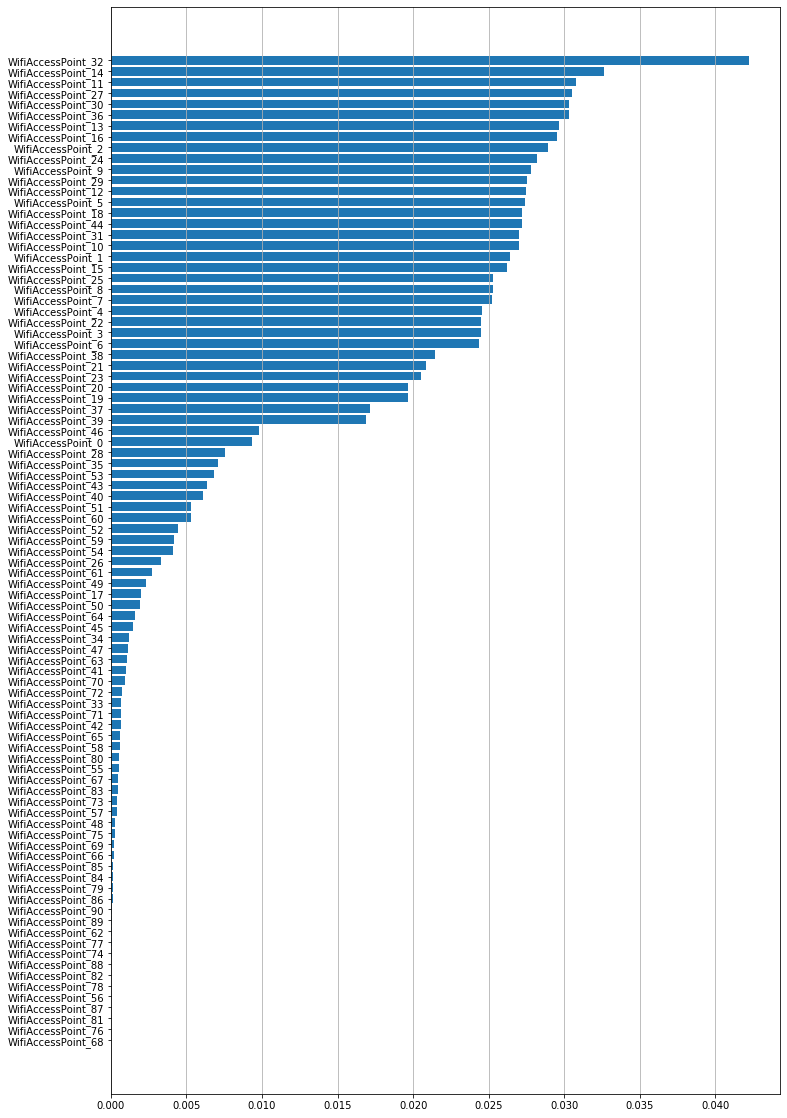

In [166]:
RF = RandomForestClassifier(
    n_estimators=model.best_params_['RF__n_estimators'], 
    max_features=model.best_params_['RF__max_features'],
    criterion=model.best_params_['RF__criterion'],
    max_depth=model.best_params_['RF__max_depth'], 
    min_samples_leaf=model.best_params_['RF__min_samples_leaf'], 
    min_samples_split= model.best_params_['RF__min_samples_split'], 
    bootstrap=model.best_params_['RF__bootstrap'],
    random_state=model.best_params_['RF__random_state'],
    n_jobs=-1)
RF.fit(X_train, y_train)

pred_train = RF.predict(X_train)
pred_test = RF.predict(X_test)

# Train score
accuracy_score_train = accuracy_score(y_train, pred_train)
print("    accuracy_score train = {:.4f}".format(accuracy_score_train))

# Test score
accuracy_score_test = accuracy_score(y_test, pred_test)
print("    accuracy_score test = {:.4f}".format(accuracy_score_test))

print("\nconfusion matrix:")
print(confusion_matrix(y_test, pred_test))
print("\nclassification report:")
print(classification_report(y_test, pred_test))

feat_imp = pd.DataFrame(
    {'cols':X_train.columns, 
     'imp':RF.feature_importances_
    }).sort_values('imp', ascending=True)

space = np.arange(len(feat_imp.cols))
plt.figure(figsize=(12,20))
plt.barh(space, feat_imp.imp)
plt.yticks(space, feat_imp.cols)
_ = plt.grid(axis='x')

In [187]:
RF = RandomForestClassifier(
    n_estimators=model.best_params_['RF__n_estimators'], 
    max_features=model.best_params_['RF__max_features'],
    criterion=model.best_params_['RF__criterion'],
    max_depth=model.best_params_['RF__max_depth'], 
    min_samples_leaf=model.best_params_['RF__min_samples_leaf'], 
    min_samples_split= model.best_params_['RF__min_samples_split'], 
    bootstrap=model.best_params_['RF__bootstrap'],
    random_state=model.best_params_['RF__random_state'],
    n_jobs=-1)
RF.fit(X_train, y_train)

pred_train = RF.predict(X_train)
pred_test = RF.predict(X_test)

# Train score
accuracy_score_train = accuracy_score(y_train, pred_train)
print("    accuracy_score train = {:.4f}".format(accuracy_score_train))

# Test score
accuracy_score_test = accuracy_score(y_test, pred_test)
print("    accuracy_score test = {:.4f}".format(accuracy_score_test))

    accuracy_score train = 1.0000
    accuracy_score test = 0.7497
